In [ ]:
! git clone https://github.com/huggingface/diffusers.git

In [ ]:
import torch
import matplotlib.pyplot as plt
import random
import threading
from librosa.beat import beat_track
from pythonosc import dispatcher, osc_server
import numpy as np
from datasets import load_dataset
from diffusers_local import DiffusionPipeline, DDIMScheduler, AudioDiffusionPipeline
from diffusers_local import UNet2DModel as UNet2DModel_local
import soundfile as sf
from CreateDataset import AudioProcessor
from NetworkBending import NetworkBending
import time

osc_lock = threading.Lock()

NB = NetworkBending()

device = "cuda" if torch.cuda.is_available() else "cpu"
audio_diffusion = DiffusionPipeline.from_pretrained("teticio/audio-diffusion-ddim-256")
# apply the custom unet model so we can Networkbend the audio
audio_diffusion.unet = UNet2DModel_local.from_pretrained("teticio/audio-diffusion-ddim-256", subfolder="unet", network_bending=NB)

#set the scheduler to DDIM
audio_diffusion.scheduler = DDIMScheduler.from_pretrained("teticio/audio-diffusion-ddim-256", subfolder="scheduler")
audio_diffusion.to(device)

#ds = load_dataset('teticio/audio-diffusion-256')
#generator=torch.Generator(device="cpu").manual_seed(42)

alpha = 0
latent1 = 0
latent2 = 1
diffusion_steps = 10
make_loop = 0
generate = 1

c:\Users\danhearn\.conda\envs\diffusertrack\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import torch
import matplotlib.pyplot as plt
import random
import threading
from librosa.beat import beat_track
from pythonosc import dispatcher, osc_server
import numpy as np
from datasets import load_dataset
from diffusers_local import DDIMScheduler, AudioDiffusionPipeline, UNet2DModel as UNet2DModel_local, Mel
import soundfile as sf
from CreateDataset import AudioProcessor
from NetworkBending import NetworkBending
from MelVocoder import MelVocoder  
import time

osc_lock = threading.Lock()

NB = NetworkBending()
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the MelVocoder for audio synthesis
vocoder = MelVocoder(device_name=device)  # Use MelVocoder for spectrogram-to-audio conversion

# Load the custom UNet model and apply NetworkBending
unet = UNet2DModel_local.from_pretrained("teticio/audio-diffusion-ddim-256", subfolder="unet", network_bending=NB)
# Set up the DDIM scheduler
scheduler = DDIMScheduler.from_pretrained("teticio/audio-diffusion-ddim-256", subfolder="scheduler")

mel = Mel()

unet.config.sample_size = 512

# Initialize the AudioDiffusionPipeline with custom components
audio_diffusion = AudioDiffusionPipeline(
    vqvae=None,  # Assuming no VQ-VAE is needed; adjust if required
    unet=unet,
    mel=mel,
    vocoder=vocoder,
    scheduler=scheduler,
)
audio_diffusion.to(device)

# Optional: Load a dataset
# ds = load_dataset('teticio/audio-diffusion-256')
# generator = torch.Generator(device="cpu").manual_seed(42)

print(unet.config)

alpha = 0
latent1 = 0
latent2 = 1
diffusion_steps = 10
make_loop = 0
generate = 1

c:\Users\danhearn\.conda\envs\diffusertrack\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\danhearn\.conda\envs\diffusertrack\Lib\site-packages\kornia\feature\lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
c:\Users\danhearn\.conda\envs\diffusertrack\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
c:\Users\danhearn\.conda\envs\diffusertrack\Lib\site-packages\torch\nn\utils\weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn

UNet2DModel(
  (conv_in): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-05, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Con

In [3]:
from MelVocoder import MelVocoder

# Initialize the vocoder
vocoder = MelVocoder(device_name="cuda", model_name="best_netG.pt")

# Vocode a sample (assuming `sample` is a Mel spectrogram tensor)
#audio_output = vocoder.vocode(sample)

In [2]:
# Load audio and process it into 5 second spectrograms
input_dir = r"C:\\Users\\danhearn\\Music" 
processor = AudioProcessor(input_dir)
processor.process_directory()

An error occurred while trying to fetch teticio/audio-diffusion-ddim-256: teticio/audio-diffusion-ddim-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Saved mel spectrogram: chunk_1_b494d03c-faf7-44ca-9bff-c9cd4e998942.png
Saved mel spectrogram: chunk_10_609576f6-3ae9-4dd2-91b0-a34e1234747f.png
Saved mel spectrogram: chunk_11_bf9158b2-d503-47ab-9a83-f6e4a1ed2ccf.png
Saved mel spectrogram: chunk_12_011d0de9-d0eb-4069-ac06-addf22e2b6c0.png
Saved mel spectrogram: chunk_13_ca55f807-2bb5-4079-baa3-62f70f31c9e8.png
Saved mel spectrogram: chunk_14_4e769783-fd0b-4881-977e-899e77ae89f7.png
Saved mel spectrogram: chunk_15_2bff10a4-b9b6-4bda-8906-389fed39d8c6.png
Saved mel spectrogram: chunk_16_36c33995-2c35-4712-a9f8-80291609eb19.png
Saved mel spectrogram: chunk_17_b5797965-367e-4a0f-94ff-222461e18561.png
Saved mel spectrogram: chunk_18_7e50a174-5532-414e-b5f4-d65cd56f83ac.png
Saved mel spectrogram: chunk_19_bc0ae518-0be1-43f2-9b61-d64cad2ebe52.png
Saved mel spectrogram: chunk_2_8da82d88-9a35-4477-9c94-da380824eb78.png
Saved mel spectrogram: chunk_20_7fcf3e80-4abf-4a99-822f-8540f77bd165.png
Saved mel spectrogram: chunk_21_880d798b-65a1-4d97-b4

In [2]:
def loop_it(audio: np.ndarray,
        sample_rate: int,
        loops: int = 1) -> np.ndarray:
    """Loop audio

    Args:
        audio (np.ndarray): audio as numpy array
        sample_rate (int): sample rate of audio
        loops (int): number of times to loop

    Returns:
        (float, np.ndarray): sample rate and raw audio or None
    """
    _, beats = beat_track(y=audio, sr=sample_rate, units='samples')
    for beats_in_bar in [16, 12, 8, 4]:
        if len(beats) > beats_in_bar:
            return np.tile(audio[beats[0]:beats[beats_in_bar]], loops)
    return None

def interpolation(address, *args):
    
    """Interpolate between two latents for generation
    Args:
        address (str): OSC address
        *args: OSC arguments
    """

    global alpha, latent1, latent2
    
    if address == "/alpha":
        alpha = args[0]
    if address == "/latent1" and latent2 != args[0]:
        latent1 = int(args[0])
    if address == "/latent2" and latent1 != args[0]:
        latent2 = int(args[0])

def inference(address, *args):

    """Control the inference process
    Args:
        address (str): OSC address
        *args: OSC arguments
    """

    global diffusion_steps, make_loop, generate

    if address == "/steps":
        diffusion_steps = int(args[0])
    if address == "/loop":
        make_loop = int(args[0])
    if address == "/generate":
        generate = int(args[0])

In [ ]:
#load 20 images from the default dataset
ds = load_dataset('teticio/audio-diffusion-256')
images = []

for i in range(20):
    images.append(random.choice(ds['train'])['image'])

images[0].show()


In [3]:
import os
from PIL import Image
import torch
import numpy as np

# Assuming `audio_diffusion` is your Diffusion model pipeline
encoded_images = []

# Directory containing mel spectrograms
spectrogram_dir = "data/mel_spectrograms"

# Loop through each file in the directory
for i, file_name in enumerate(os.listdir(spectrogram_dir)):
    spectrogram_path = os.path.join(spectrogram_dir, file_name)
    spectrogram_image = Image.open(spectrogram_path).convert("L")
    encoded_image = audio_diffusion.encode([spectrogram_image], steps=100)
    encoded_images.append(encoded_image)
    if len(encoded_images) >= 10:
        break


  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\danhearn\Documents\GitHub\diffusertrack\diffusers_local\models\attention_processor.py:2367: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 100/100 [00:02<00:00, 42.82it/s]


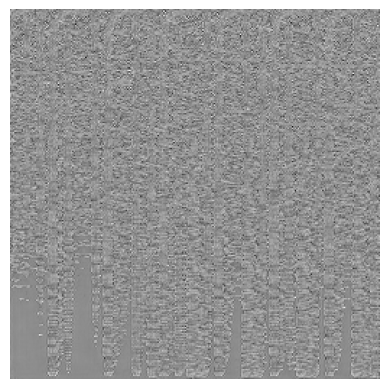

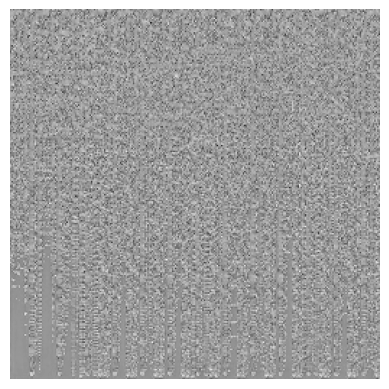

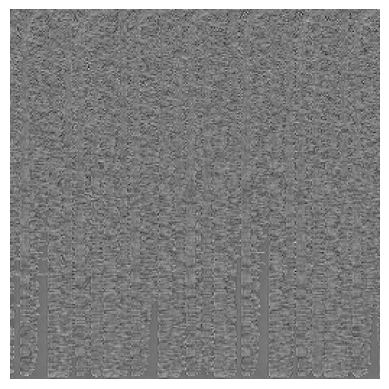

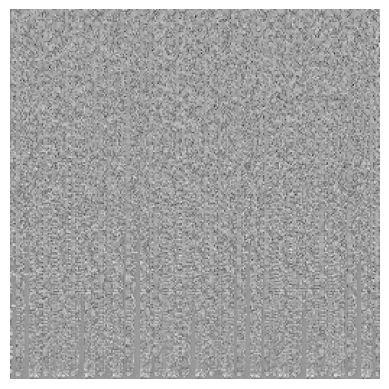

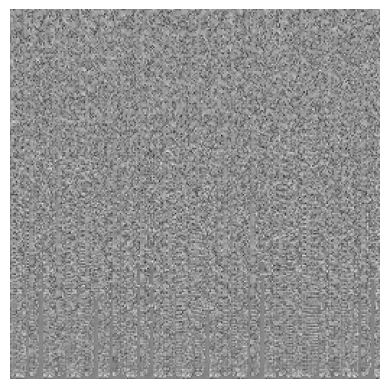

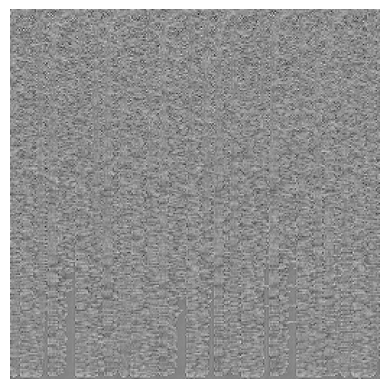

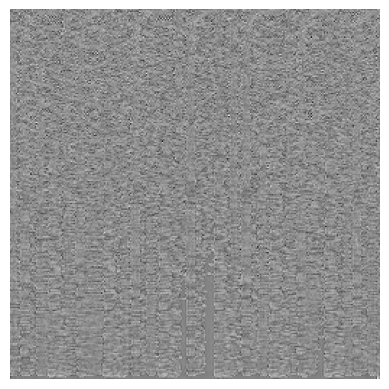

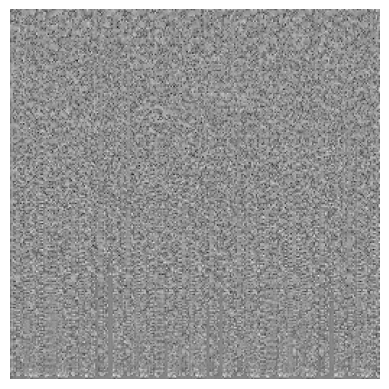

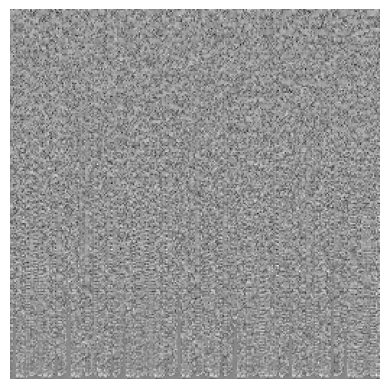

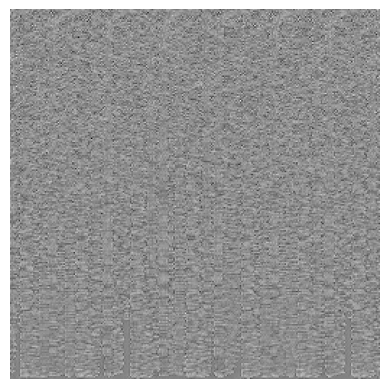

In [4]:
for encoded_image in encoded_images:
    plt.imshow(encoded_image.cpu().squeeze(), cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()
    

In [ ]:
#osc listener
from pythonosc import dispatcher, osc_server

ip="127.0.0.1"
port=9999

d = dispatcher.Dispatcher()
# Map incoming OSC messages to the osc_receive method
d.map("/rotate_x_radian",  NB.osc_receive)
d.map("/rotate_y_radian", NB.osc_receive)
d.map("/rotate_z_radian", NB.osc_receive)
d.map("/rotate_x_scaling_factor", NB.osc_receive)
d.map("/rotate_y_scaling_factor", NB.osc_receive)
d.map("/rotate_z_scaling_factor", NB.osc_receive)
d.map("/scale_factor", NB.osc_receive)
d.map("/layer", NB.osc_receive)
d.map("/scale", NB.osc_receive)
d.map("/reflect", NB.osc_receive)
d.map("/erosion", NB.osc_receive)
d.map("/dilation", NB.osc_receive)
d.map("/gradient", NB.osc_receive)
d.map("/sobel", NB.osc_receive)
d.map("/add_rand_rows", NB.osc_receive)
d.map("/normalize", NB.osc_receive)
d.map("/rotate_x", NB.osc_receive)
d.map("/rotate_y", NB.osc_receive)
d.map("/rotate_z", NB.osc_receive)
d.map("/alpha", interpolation)
d.map("/latent1", interpolation)
d.map("/latent2", interpolation)
d.map("/steps", inference)
d.map("/loop", inference)
d.map("/generate", inference)

s = osc_server.ThreadingOSCUDPServer((ip, port), d)

osc_thread = threading.Thread(target=s.serve_forever)
osc_thread.daemon = True # This will allow the main program to exit even if the OSC server is still running
osc_thread.start()
print("OSC server started - listening on port 9999")

In [5]:
# Main loop for image generation
try:
    while True:
        with osc_lock: 

            if generate == 1:
             
                output = audio_diffusion(steps=50,
                noise=AudioDiffusionPipeline.slerp(encoded_images[latent1], encoded_images[latent2], alpha), eta=0)

                output.images[0].save("generated_image.png")
                audio = output.audios[0, 0]

                if make_loop == 1:
                    loop = loop_it(audio, audio_diffusion.mel.get_sample_rate())
                    sf.write("output_audio.wav", loop, audio_diffusion.mel.get_sample_rate())
                elif make_loop == 0:
                    #time.sleep(0.05)
                    sf.write("output_audio.wav", audio, audio_diffusion.mel.get_sample_rate())



except KeyboardInterrupt:
    s.shutdown()
    print("Terminating the loop gracefully.")

100%|██████████| 50/50 [00:01<00:00, 35.07it/s]


Sample shape adjusted to torch.Size([1, 1, 256, 256])
Sample shape adjusted to torch.Size([1, 1, 80, 256])
Sample shape resized to torch.Size([1, 1, 80, 512])
Audio output shape: torch.Size([1, 1, 131072])


100%|██████████| 50/50 [00:01<00:00, 42.84it/s]


Sample shape adjusted to torch.Size([1, 1, 256, 256])
Sample shape adjusted to torch.Size([1, 1, 80, 256])
Sample shape resized to torch.Size([1, 1, 80, 512])
Audio output shape: torch.Size([1, 1, 131072])


100%|██████████| 50/50 [00:01<00:00, 42.02it/s]


Sample shape adjusted to torch.Size([1, 1, 256, 256])
Sample shape adjusted to torch.Size([1, 1, 80, 256])
Sample shape resized to torch.Size([1, 1, 80, 512])
Audio output shape: torch.Size([1, 1, 131072])


100%|██████████| 50/50 [00:01<00:00, 40.69it/s]


Sample shape adjusted to torch.Size([1, 1, 256, 256])
Sample shape adjusted to torch.Size([1, 1, 80, 256])
Sample shape resized to torch.Size([1, 1, 80, 512])
Audio output shape: torch.Size([1, 1, 131072])


100%|██████████| 50/50 [00:01<00:00, 39.98it/s]


Sample shape adjusted to torch.Size([1, 1, 256, 256])
Sample shape adjusted to torch.Size([1, 1, 80, 256])
Sample shape resized to torch.Size([1, 1, 80, 512])
Audio output shape: torch.Size([1, 1, 131072])


 10%|█         | 5/50 [00:00<00:00, 46.03it/s]


NameError: name 's' is not defined